In [10]:
import pickle
import datetime
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import clear_output
from matplotlib.dates import DateFormatter

In [11]:
with open('model.pkl', 'rb') as f:
    model = pickle.load(f)

In [12]:
temp_store = {}

## API call to store temperature

In [13]:
sum = 0
cnt = 0
secSteps = 3600
URL = "http://api.openweathermap.org/data/2.5/forecast?id=1269843&appid=95e286bae5647877dbb924f3779736a8&units=imperial"
r = requests.get(url=URL)
data = r.json()
for ind in range(len(data['list'])):
    dt = data['list'][ind]['dt_txt']
    temp = data['list'][ind]['main']['temp']
    print(dt,temp)
    print('\n')
    sum += temp*3
    cnt += 3
    temp_store[dt] = temp
    dt = datetime.datetime.strptime(dt,'%Y-%m-%d %H:%M:%S')
    dt += datetime.timedelta(seconds=secSteps)
    temp_store[str(dt)] = temp
    dt += datetime.timedelta(seconds=secSteps)
    temp_store[str(dt)] = temp

avg_temp = sum/cnt

2023-12-09 00:00:00 66.31


2023-12-09 03:00:00 69.93


2023-12-09 06:00:00 79.81


2023-12-09 09:00:00 82.63


2023-12-09 12:00:00 78.57


2023-12-09 15:00:00 74.7


2023-12-09 18:00:00 71.02


2023-12-09 21:00:00 68.45


2023-12-10 00:00:00 66.74


2023-12-10 03:00:00 72.07


2023-12-10 06:00:00 79.97


2023-12-10 09:00:00 83.05


2023-12-10 12:00:00 77.81


2023-12-10 15:00:00 72.27


2023-12-10 18:00:00 69.08


2023-12-10 21:00:00 67.1


2023-12-11 00:00:00 65.59


2023-12-11 03:00:00 71.11


2023-12-11 06:00:00 79.88


2023-12-11 09:00:00 83.07


2023-12-11 12:00:00 77.72


2023-12-11 15:00:00 71.51


2023-12-11 18:00:00 68.56


2023-12-11 21:00:00 66.61


2023-12-12 00:00:00 64.96


2023-12-12 03:00:00 70.12


2023-12-12 06:00:00 79.02


2023-12-12 09:00:00 82.02


2023-12-12 12:00:00 76.95


2023-12-12 15:00:00 71.62


2023-12-12 18:00:00 68.95


2023-12-12 21:00:00 67.19


2023-12-13 00:00:00 65.55


2023-12-13 03:00:00 70.72


2023-12-13 06:00:00 79.99


2023-12-13 09:00:00 82

In [14]:
print(avg_temp)

73.198


In [15]:
def predict(data):
    test = pd.DataFrame([data], columns = ['ds']) 
    try:
        test['temp'] = temp_store[str(data)]
    except:
        test['temp'] = avg_temp
    val = model.predict(test)
    return np.exp(val['yhat'])

In [16]:
def plot():
    clear_output(wait=True)    
    fig, ax = plt.subplots(figsize=(12,5))
    ax.plot(x,y)
    plt.xlabel('DateTime') 
    plt.ylabel('Predicted Value') 
    plt.title('Prediction over a time period') 
    ax.xaxis_date() 
    fig.autofmt_xdate()
    plt.show() 

In [17]:
x = []
y = []

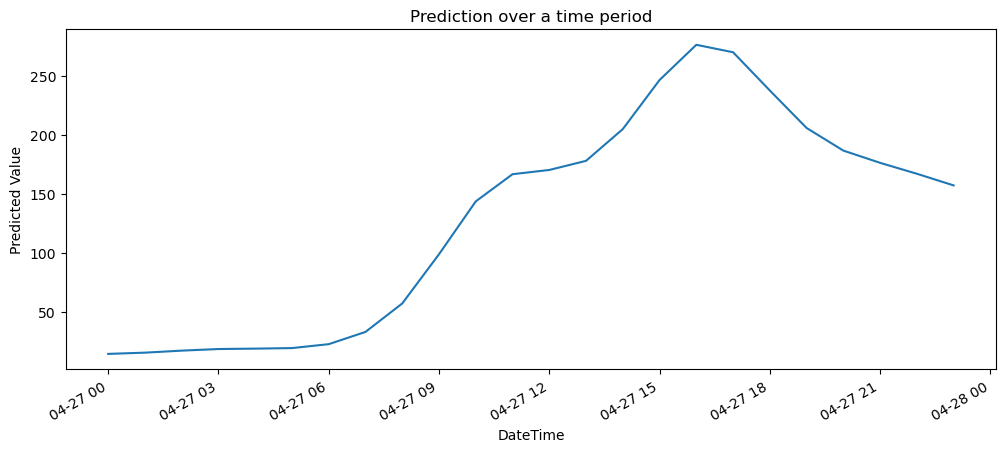

2020-04-27 23:00:00 0    157.050862
Name: yhat, dtype: float64


In [18]:
def runDay(date,secSteps):    
    startDay = date.replace(hour= 0, minute= 0, second= 0)
    endDay   = date.replace(hour=23, minute=59, second=59)
    day = startDay
    while day <= endDay:
        x.append(day)
        val = predict(day)
        y.append(val)
        plot()
        print(day,val)
        day += datetime.timedelta(seconds=secSteps)

firstDate = datetime.datetime(2020,4,27,0,0,0)
lastDate  = datetime.datetime(2020,4,27,8,0,0)
daySteps  = 1
secSteps = 3600

date = firstDate
while date <= lastDate:
    NumberOfDay = date.timetuple()[7]
    runDay(date,secSteps)
    date += datetime.timedelta(days=daySteps)